# Valuation of USD Swap using Different Curve Building Assumptions

This follows example mentioned in the blogpost at https://blog.deriscope.com/index.php/en/excel-interest-rate-swap-price-dual-bootstrapping-curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.rates import *

In [3]:
value_dt = Date(22, 5, 2019)

## Building the Discounting OIS Curve

We construct the OIS curve from a series of swaps, some forward starting. The default assumption on the floating leg is annual payments.

In [4]:
depo_dcc_type = DayCountTypes.ACT_360
depos = []

spot_days = 0
settle_dt = value_dt.add_weekdays(spot_days)
depo = IborDeposit(settle_dt, "1D", 2.3900/100.0, depo_dcc_type); depos.append(depo)

spot_days = 2
settle_dt = value_dt.add_weekdays(spot_days)

fras = []

swaps = []
swap_type = SwapTypes.PAY
fixed_dcc_type = DayCountTypes.ACT_365F
fixed_freq_type = FrequencyTypes.ANNUAL

# Standard OIS with standard annual terms
swap = OIS(settle_dt, "1W", swap_type, 2.3883/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "2W", swap_type, 2.3842/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "3W", swap_type, 2.3920/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "1M", swap_type, 2.3885/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "2M", swap_type, 2.3850/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "3M", swap_type, 2.3770/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "4M", swap_type, 2.3700/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "5M", swap_type, 2.3550/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "6M", swap_type, 2.3383/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "9M", swap_type, 2.2810/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "12M", swap_type, 2.2280/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "18M", swap_type, 2.1264/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "2Y", swap_type, 2.0547/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "3Y", swap_type, 1.9830/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "4Y", swap_type, 1.9650/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "5Y", swap_type, 1.9730/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "7Y", swap_type, 2.0252/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "10Y", swap_type, 2.1155/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "12Y", swap_type, 2.1703/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "15Y", swap_type, 2.2254/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "20Y", swap_type, 2.2719/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "25Y", swap_type, 2.2860/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "30Y", swap_type, 2.2865/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "40Y", swap_type, 2.2714/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "50Y", swap_type, 2.2406/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)

ois_depos = depos.copy()
ois_fras = fras.copy()
ois_swaps = swaps.copy()

In [5]:
oisCurves = {}
for interp_type in InterpTypes:
    ois_curve = OISCurve(value_dt, ois_depos, ois_fras, ois_swaps, interp_type)
    oisCurves[interp_type] = ois_curve

## Building the Dual Curve

Now we build the dual curve

In [6]:
mmDCType = DayCountTypes.ACT_360
depos = []

spot_days = 0
settle_dt = value_dt.add_weekdays(spot_days)
depo = IborDeposit(settle_dt, "3M", 2.52338/100.0, mmDCType); depos.append(depo)

fras = []
f1 = settle_dt.next_imm_date()
f2 = f1.next_imm_date()
f3 = f2.next_imm_date()
f4 = f3.next_imm_date()
f5 = f4.next_imm_date()
f6 = f5.next_imm_date()
f7 = f6.next_imm_date()

fra = IborFRA(f1, f2, 2.5249/100, mmDCType); fras.append(fra)
fra = IborFRA(f2, f3, 2.4344/100, mmDCType); fras.append(fra)
fra = IborFRA(f3, f4, 2.3737/100, mmDCType); fras.append(fra)
fra = IborFRA(f4, f5, 2.2376/100, mmDCType); fras.append(fra)
fra = IborFRA(f5, f6, 2.1363/100, mmDCType); fras.append(fra)
fra = IborFRA(f6, f7, 2.0748/100, mmDCType); fras.append(fra)

swaps = []
swap_type = SwapTypes.PAY
fixed_dcc_type = DayCountTypes.THIRTY_360_BOND
fixed_freq_type = FrequencyTypes.SEMI_ANNUAL

swap = IborSwap(settle_dt, "2Y", swap_type, 2.2892/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "3Y", swap_type, 2.2184/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "4Y", swap_type, 2.2004/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "5Y", swap_type, 2.2097/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "6Y", swap_type, 2.2340/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "7Y", swap_type, 2.2621/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "8Y", swap_type, 2.2936/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "9Y", swap_type, 2.3265/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "10Y", swap_type, 2.3585/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "11Y", swap_type, 2.3885/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "12Y", swap_type, 2.4161/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "15Y", swap_type, 2.4759/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "20Y", swap_type, 2.5288/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "25Y", swap_type, 2.5455/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "30Y", swap_type, 2.5510/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "40Y", swap_type, 2.5347/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "50Y", swap_type, 2.5050/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)

ibor_depos = depos.copy()
ibor_fras = fras.copy()
ibor_swaps = swaps.copy()

In [7]:
ibor_single_curves = {}
for interp_type in InterpTypes:
    ibor_single_curves[interp_type] = IborSingleCurve(value_dt, ibor_depos, ibor_fras, ibor_swaps, interp_type)

In [8]:
ibor_dual_curves = {}
for interp_type in InterpTypes:
    ois_curve = oisCurves[interp_type]
    ibor_dual_curves[interp_type] = IborDualCurve(value_dt, ois_curve, ibor_depos, ibor_fras, ibor_swaps, interp_type)

## Swap Valuation

In [9]:
settle_dt = value_dt.add_weekdays(2)
start_dt = settle_dt.add_tenor("7M")
maturity_dt = start_dt.add_tenor("5Y")
notional = ONE_MILLION
swap_type = SwapTypes.PAY
fixed_rate = 0.0218
fixed_dcc_type = DayCountTypes.THIRTY_360_BOND
fixed_freq_type = FrequencyTypes.SEMI_ANNUAL
float_spread = 0.0
float_dcc_type = DayCountTypes.ACT_360
float_freq_type = FrequencyTypes.QUARTERLY

In [10]:
off_market_swap = IborSwap(start_dt, maturity_dt, swap_type,
                            fixed_rate, fixed_freq_type, fixed_dcc_type,
                            notional,
                            float_spread, float_freq_type, float_dcc_type,
                            CalendarTypes.UNITED_KINGDOM)

In [11]:
swapSingleValues = {}
for interp_type in InterpTypes:
    ois_curve = oisCurves[interp_type]
    ibor_single_curve = ibor_single_curves[interp_type]
    swapSingleValues[interp_type] = off_market_swap.value(value_dt, ibor_single_curve)

In [12]:
swapDualValues = {}
for interp_type in InterpTypes:
    ois_curve = oisCurves[interp_type]
    ibor_dual_curve = ibor_dual_curves[interp_type]
    swapDualValues[interp_type] = off_market_swap.value(value_dt, ois_curve, ibor_dual_curve)

In [13]:
swapSingleValues

{<InterpTypes.FLAT_FWD_RATES: 1>: 1862.46474364998,
 <InterpTypes.LINEAR_FWD_RATES: 2>: 1584.2240620536468,
 <InterpTypes.LINEAR_ZERO_RATES: 4>: 1800.1496050580608,
 <InterpTypes.FINCUBIC_ZERO_RATES: 7>: np.float64(1749.0899279506411),
 <InterpTypes.NATCUBIC_LOG_DISCOUNT: 8>: np.float64(1754.1915105890657),
 <InterpTypes.NATCUBIC_ZERO_RATES: 9>: np.float64(1749.1273922466207),
 <InterpTypes.PCHIP_ZERO_RATES: 10>: np.float64(1724.2938336229272),
 <InterpTypes.PCHIP_LOG_DISCOUNT: 11>: np.float64(1753.209560832649),
 <InterpTypes.LINEAR_ONFWD_RATES: 21>: np.float64(1476.228885753284),
 <InterpTypes.TENSION_ZERO_RATES: 22>: np.float64(1749.8742711720697)}

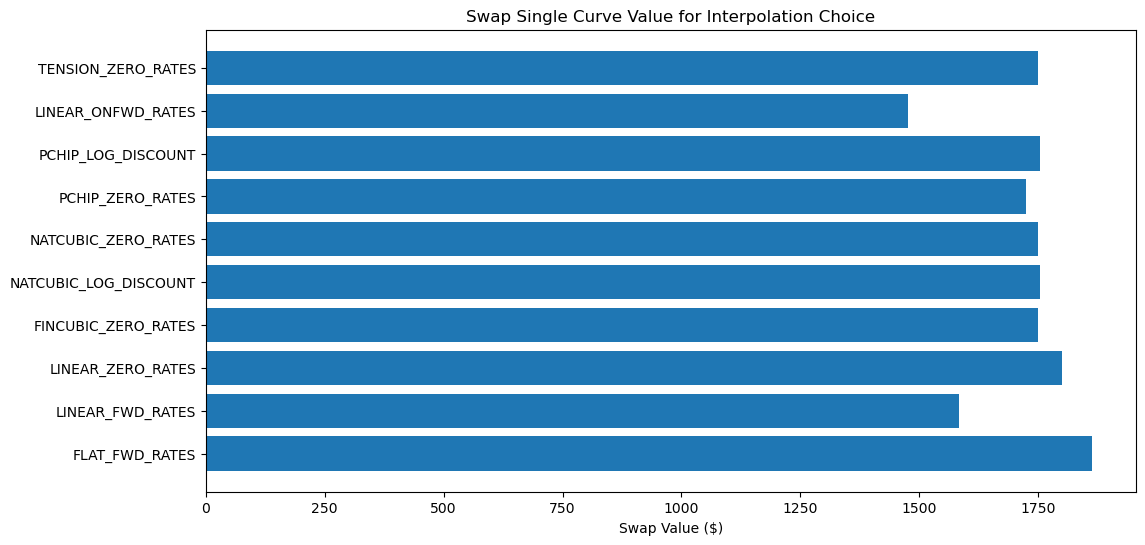

In [14]:
plt.figure(figsize=(12,6))
interp_types = []
for interp_type in InterpTypes:
    interp_types.append(interp_type.name)

vsingle = []
for interp_type in InterpTypes:
    vsingle.append(swapSingleValues[interp_type])

plt.barh(interp_types, vsingle)
plt.title("Swap Single Curve Value for Interpolation Choice")
plt.xlabel("Swap Value ($)");

In [15]:
swapDualValues

{<InterpTypes.FLAT_FWD_RATES: 1>: 1893.9815990024654,
 <InterpTypes.LINEAR_FWD_RATES: 2>: 1614.9335015085671,
 <InterpTypes.LINEAR_ZERO_RATES: 4>: 1831.9131829557737,
 <InterpTypes.FINCUBIC_ZERO_RATES: 7>: np.float64(1771.11679578849),
 <InterpTypes.NATCUBIC_LOG_DISCOUNT: 8>: np.float64(1781.0642837284395),
 <InterpTypes.NATCUBIC_ZERO_RATES: 9>: np.float64(1779.2741932580975),
 <InterpTypes.PCHIP_ZERO_RATES: 10>: np.float64(1758.0975621148682),
 <InterpTypes.PCHIP_LOG_DISCOUNT: 11>: np.float64(1783.9735573185317),
 <InterpTypes.LINEAR_ONFWD_RATES: 21>: np.float64(1485.2001960325288),
 <InterpTypes.TENSION_ZERO_RATES: 22>: np.float64(1780.0406821273064)}

We can plot a histogram of the results

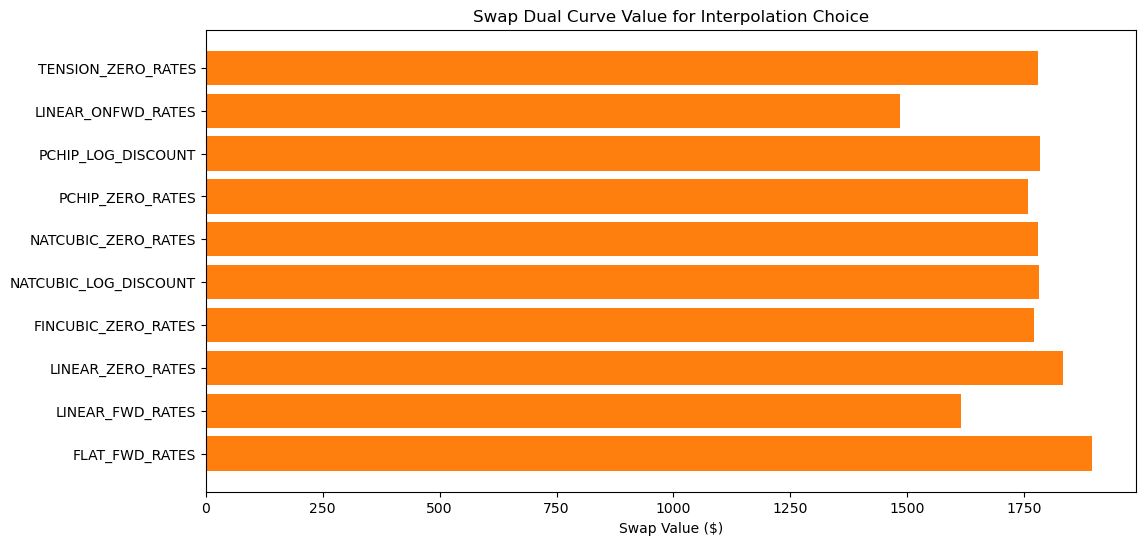

In [16]:
plt.figure(figsize=(12,6))
interp_types = []
for interp_type in InterpTypes:
    interp_types.append(interp_type.name)

vdual = []
for interp_type in InterpTypes:
    vdual.append(swapDualValues[interp_type])

plt.barh(interp_types, vsingle)
plt.barh(interp_types, vdual)

plt.title("Swap Dual Curve Value for Interpolation Choice")
plt.xlabel("Swap Value ($)");

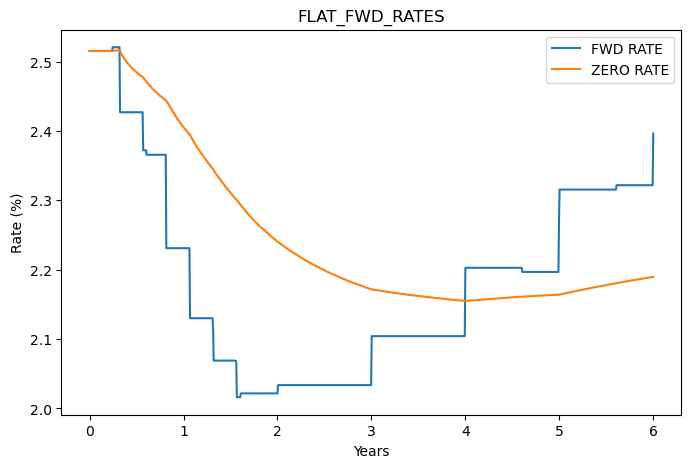

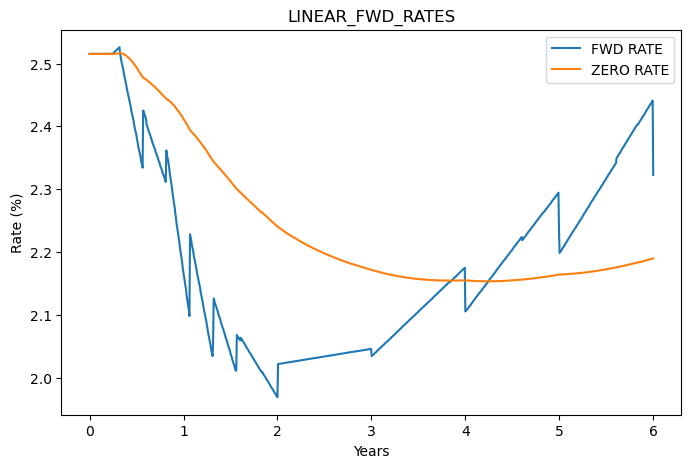

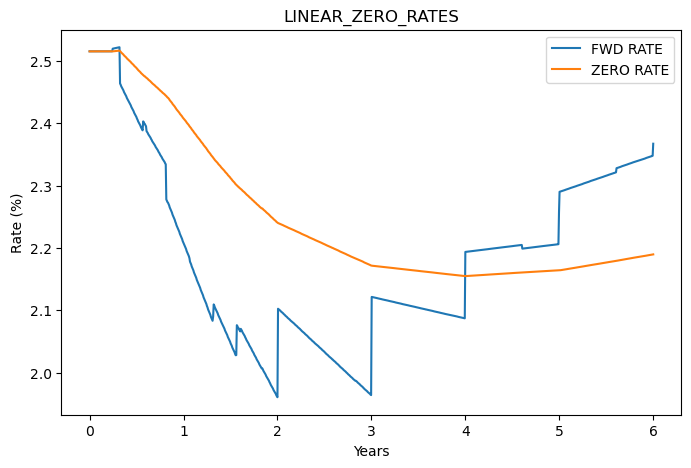

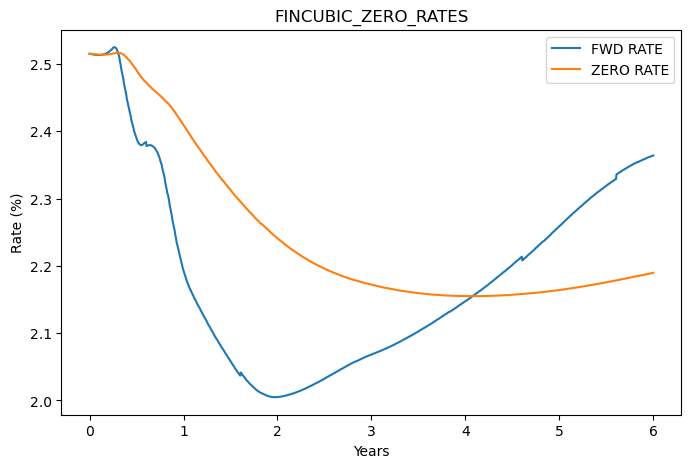

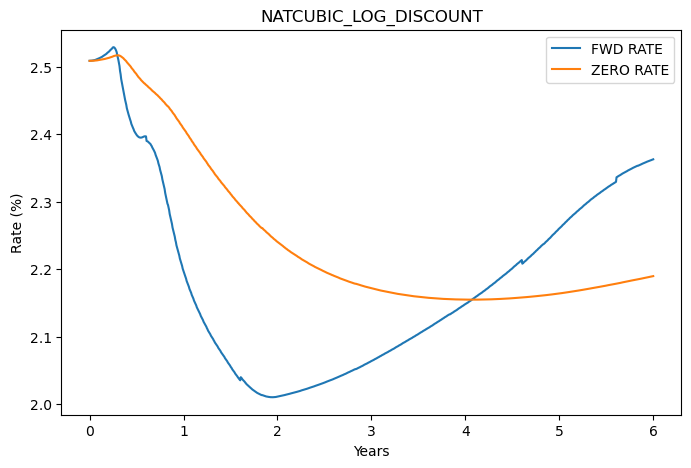

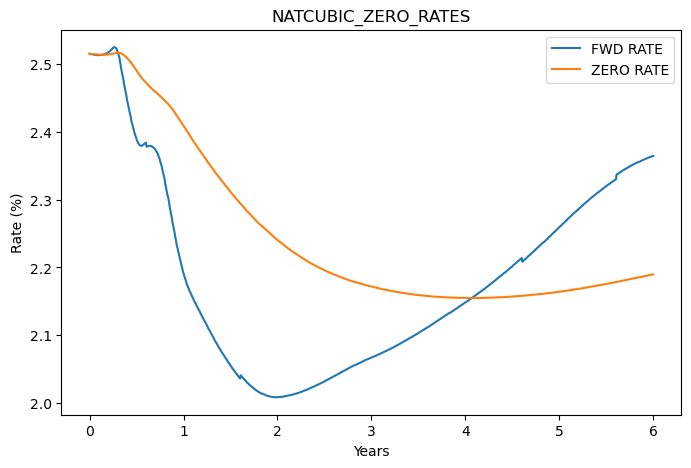

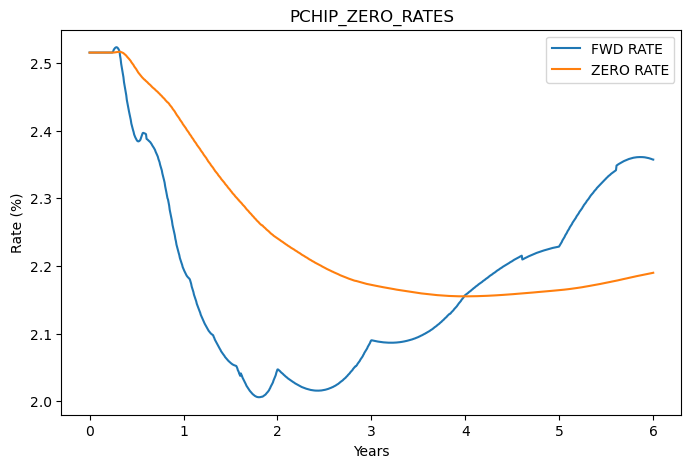

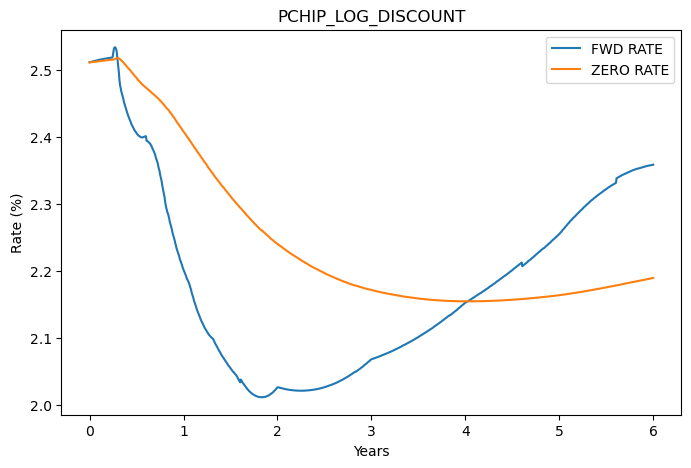

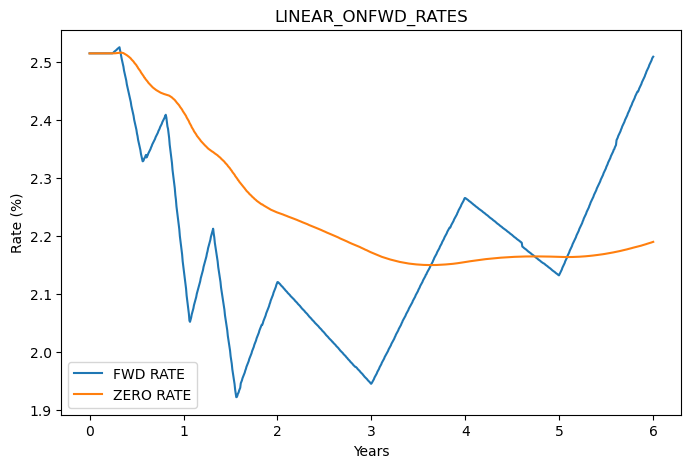

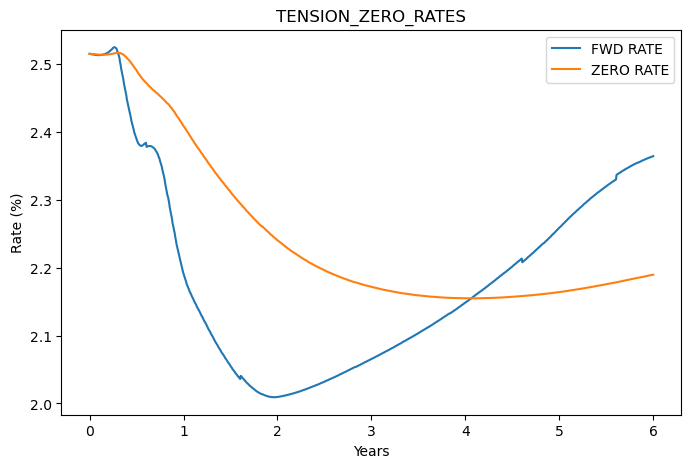

In [17]:
years = np.linspace(0, 6, 1000)
plotDates = settle_dt.add_years(years)

for interp_type in InterpTypes:

    plt.figure(figsize=(8,5))
    ibor_curve = ibor_dual_curves[interp_type]
    iborCurveFwdRate = ibor_curve.fwd_rate(plotDates, "1D")
    iborCurveZeroRate = ibor_curve.zero_rate(plotDates)

    plt.plot(years, iborCurveFwdRate*100.0, label="FWD RATE")
    plt.plot(years, iborCurveZeroRate*100.0, label="ZERO RATE")

    plt.title(interp_type.name)
    plt.xlabel("Years")
    plt.ylabel("Rate (%)")
    plt.legend();


Copyright (c) Dominic O'Kane 2020